In [146]:
import pandas as pd

Importing necessary libraries for this assignment.
Start with A-1

In [147]:
train_data = pd.read_csv('data_train.csv') #A1.1
test_data = pd.read_csv('data_test.csv') #A1.1

print(train_data.head()) #A1.2

   Unnamed: 0   Loan_ID Gender Married Dependents Education Self_Employed  \
0           0  LP001518   Male     Yes          1  Graduate            No   
1           1  LP002734   Male     Yes          0  Graduate            No   
2           2  LP002697   Male      No          0  Graduate            No   
3           3  LP002455   Male     Yes          2  Graduate            No   
4           4  LP001732   Male     Yes          2  Graduate           NaN   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             1538             1425.0        30.0             360.0   
1             6133             3906.0       324.0             360.0   
2             4680             2087.0         NaN             360.0   
3             3859                0.0        96.0             360.0   
4             5000                0.0        72.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0 

A1.2
Our train data seems to include information regarding people who have requested loans. Data has 13 features with extra column 'Unnamed' for indeces of the rows. I notice some NaNs that we will have to take care of and assume that our label will Loan_Satus later in the assignment. I notice categorical data and numeric data. Things like Gender, property_area being categorical, and numerical like ApplicantIncome, LoanAmount, etc.

In [148]:
print(train_data.shape) #A1.3

(491, 14)


A1.3: dimension of our data is 491x14 (rxc)

In [149]:
#missing values?
missing_values = train_data.isnull().sum()
print(missing_values)

train_data_cleaned = train_data.dropna() #remove rows with missing values

print("***before cleaning:", train_data.shape, "# missing: ",  train_data.isnull().sum().sum())
print("***after cleaning", train_data_cleaned.shape, "# missing: ", train_data_cleaned.isnull().sum().sum())

Unnamed: 0            0
Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64
***before cleaning: (491, 14) # missing:  129
***after cleaning (373, 14) # missing:  0


A1.4: data does have 129 missing values. I dropped the corresponding rows.

In [150]:
features = train_data_cleaned.drop(['Loan_Status', 'Loan_ID', 'Unnamed: 0'], axis=1)
label = train_data_cleaned['Loan_Status']

A1.5: extracing features and label from data features include all except first and last col and Loan_ID is unnecessary because it's just an identifier.

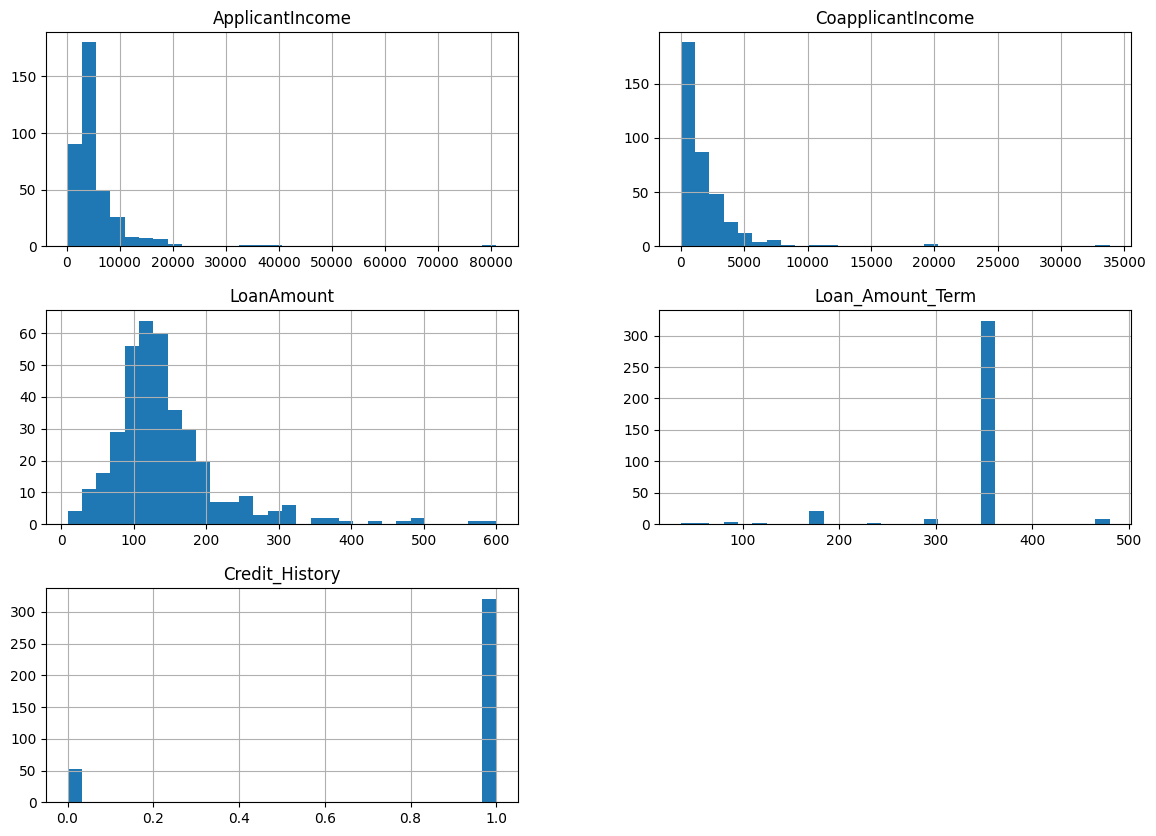

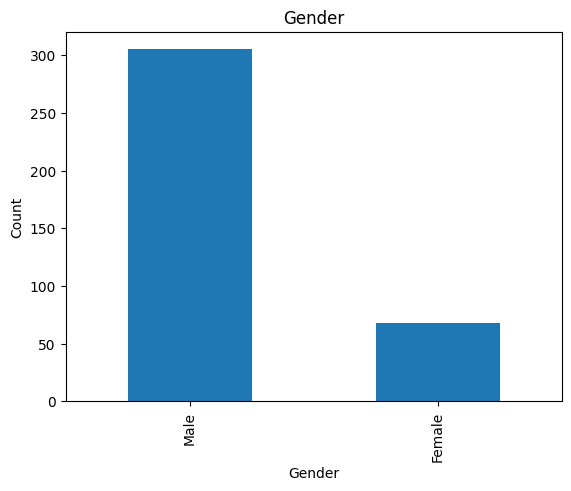

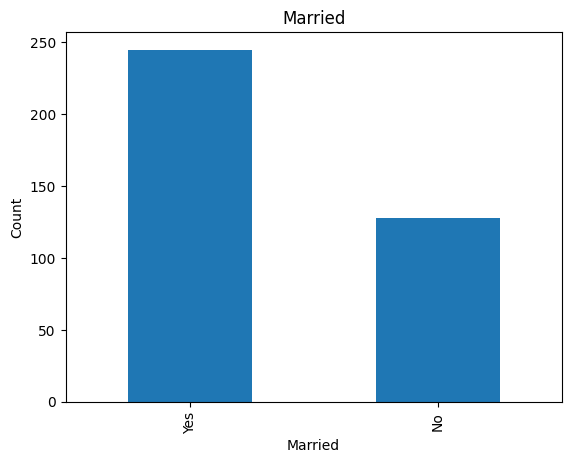

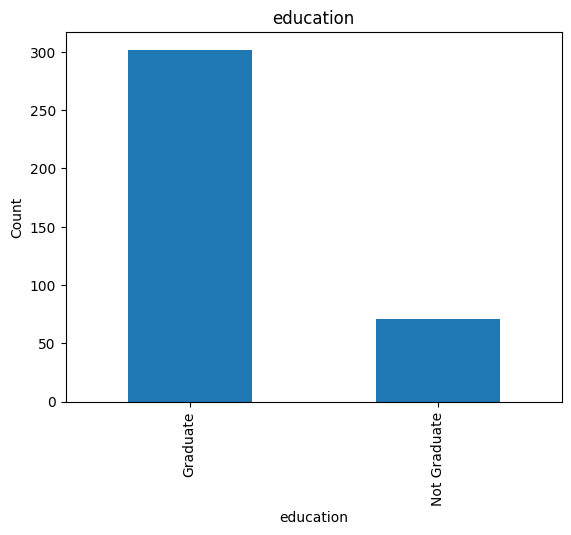

In [151]:
import matplotlib.pyplot as plt

features.hist(bins=30, figsize=(14, 10)) #for numerical values.
plt.show()

# Plotting bar plot for a categorical variable (example: Gender)
features['Gender'].value_counts().plot(kind='bar')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

features['Married'].value_counts().plot(kind='bar')
plt.title('Married')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

features['Education'].value_counts().plot(kind='bar')
plt.title('education')
plt.xlabel('education')
plt.ylabel('Count')
plt.show()

A1.6: plotted histograms for all variables.
A1.7:

Our features consist of different types. 

First, categorical features (Gender, Married, Dependents, Education, Self_Employed, Credit_history, Property_Area)

Second, continuous features (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

identifier feature Loan_ID.
target variable: Loan_status.

*A2 IMPLEMENTATION*

In [152]:
import numpy as np
from collections import Counter

In [153]:
def gini(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities**2)

Foundation component of the tree is node, defined below:

In [154]:
class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [155]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

In [156]:
def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

In [157]:
def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._gini_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

In [158]:
def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

In [159]:
def _gini_gain(self, y, X_column, split_thresh):
    parent_gini = gini(y)

    left_idxs, right_idxs = self._split(X_column, split_thresh)
    if len(left_idxs) == 0 or len(right_idxs) == 0:
        return 0

    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    g_l, g_r = gini(y[left_idxs]), gini(y[right_idxs])
    child_gini = (n_l / n) * g_l + (n_r / n) * g_r

    # Gini gain is the difference in Gini before vs. after the split
    return parent_gini - child_gini

In [160]:
def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

In [161]:
def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [162]:
def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

In [163]:
def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [164]:
import numpy as np
from collections import Counter

def gini(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities**2)


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
    
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._gini_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)
    
    def _gini_gain(self, y, X_column, split_thresh):
        parent_gini = gini(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
             return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        g_l, g_r = gini(y[left_idxs]), gini(y[right_idxs])
        child_gini = (n_l / n) * g_l + (n_r / n) * g_r

        # Gini gain is the difference in Gini before vs. after the split
        return parent_gini - child_gini
    
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
    
    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

Now we prepare the data to validate.

First, import sklearn's train_test_split

In [182]:
#convert all data from pandas to numpy to avoid errors
X_train = features.to_numpy()
y_train = label.to_numpy()

from sklearn.model_selection import train_test_split

X = features.to_numpy() #here i converted to NumPy arrays to avoid errors i had
y = label.to_numpy()

#split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)


Assessing model's accuracy function:


In [169]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [208]:
#recommended by TA to find best depth to train data.
best_depth = None
best_accuracy = 0

#since we have 373 rows and 14 cols, a rough estimate can be 373/14 = 26.6 
#test around that number.
for depth in range(17, 35):
    clf = DecisionTree(max_depth=depth, min_samples_split=2, n_feats=None)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    acc = accuracy(y_val, y_pred)
    print("Depth:", depth, "Accuracy", acc)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth

print("THE BEST DEPTH FOUND:", best_depth)
print("WITH BEST ACCURACY:", best_accuracy)


Depth: 17 Accuracy 0.72
Depth: 18 Accuracy 0.72
Depth: 19 Accuracy 0.76
Depth: 20 Accuracy 0.7466666666666667
Depth: 21 Accuracy 0.7466666666666667
Depth: 22 Accuracy 0.7333333333333333
Depth: 23 Accuracy 0.6933333333333334
Depth: 24 Accuracy 0.7733333333333333
Depth: 25 Accuracy 0.7333333333333333
Depth: 26 Accuracy 0.72
Depth: 27 Accuracy 0.7066666666666667
Depth: 28 Accuracy 0.7066666666666667
Depth: 29 Accuracy 0.72
Depth: 30 Accuracy 0.6933333333333334
Depth: 31 Accuracy 0.7066666666666667
Depth: 32 Accuracy 0.76
Depth: 33 Accuracy 0.7333333333333333
Depth: 34 Accuracy 0.7333333333333333
THE BEST DEPTH FOUND: 24
WITH BEST ACCURACY: 0.7733333333333333


After testing, max_depth of 24 seems to be around the most optimal value.
initiate decsiontree instance, fit it, use for prediction, and get accuracy


In [216]:
#max_depth 24 after we found it as most optimal
clf = DecisionTree(max_depth=24, min_samples_split=2, n_feats=None)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

val_accuracy = accuracy(y_val, y_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.72
